In [15]:
!pip install pandas numpy matplotlib scikit-learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Create a sample dataset
data = {
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'EducationLevel': [1, 2, 2, 3, 2, 3, 3, 4, 4, 5, 4, 5],  # 1=High School, 5=PhD
    'JobLevel': [1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5],
    'Salary': [35000, 40000, 50000, 60000, 70000, 80000, 85000, 100000, 110000, 125000, 130000, 150000]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Show the dataset
df


,YearsExperience,EducationLevel,JobLevel,Salary
0,1,1,1,35000
1,2,2,1,40000
2,3,2,2,50000
3,4,3,2,60000
4,5,2,3,70000
5,6,3,3,80000
6,7,3,3,85000
7,8,4,4,100000
8,9,4,4,110000
9,10,5,5,125000


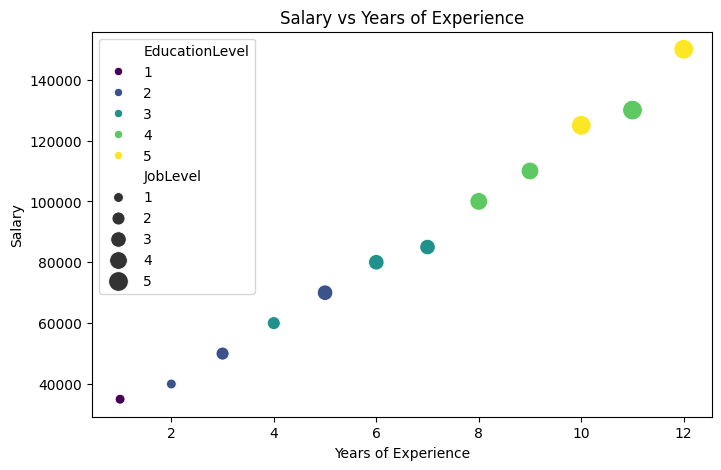

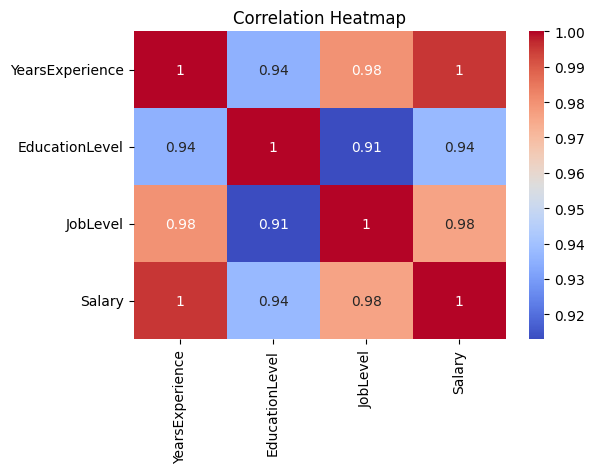

In [27]:
# 📊 Scatter plot: YearsExperience vs Salary
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, hue='EducationLevel', size='JobLevel', palette='viridis', sizes=(50, 200))
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# 📊 Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
# 🧠 Splitting data into Features (X) and Target (y)
X = df[['YearsExperience', 'EducationLevel', 'JobLevel']]  # Features
y = df['Salary']  # Target

# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict salaries for test data
y_pred_lin = lin_model.predict(X_test)


In [29]:
# 📈 Evaluate Linear Regression
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score (Accuracy):", r2_score(y_test, y_pred_lin))


Linear Regression Results:
Mean Squared Error: 30359946.129949097
R2 Score (Accuracy): 0.9840676667539626


In [30]:
# 🌳 Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict salaries with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score (Accuracy):", r2_score(y_test, y_pred_rf))



Random Forest Results:
Mean Squared Error: 56645000.0
R2 Score (Accuracy): 0.9702737609329446


In [31]:
# 👩‍💼 Predict salary for a new employee
new_employee = pd.DataFrame({
    'YearsExperience': [7],
    'EducationLevel': [4],  # 4 = MBA
    'JobLevel': [3]
})

predicted_salary = rf_model.predict(new_employee)
print(f"Predicted Salary for new employee: ${predicted_salary[0]:.2f}")


Predicted Salary for new employee: $87100.00


/tmp/ipython-input-32-1858779585.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


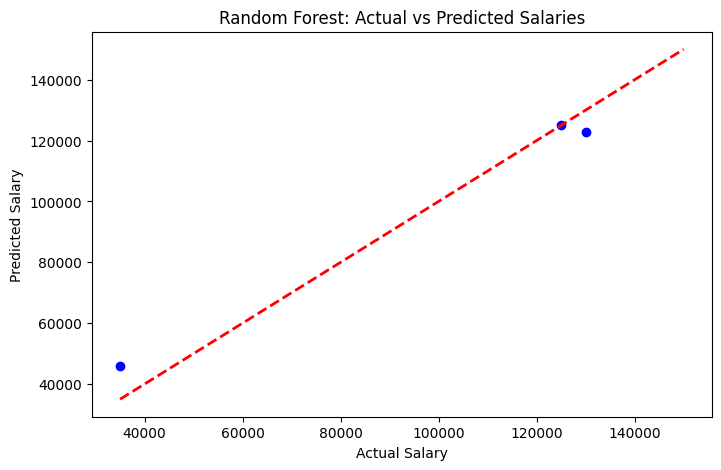

In [32]:
# 📊 Plot predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: Actual vs Predicted Salaries')
plt.show()
